In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().strftime("%d.%m.%Y")} / Tatu Erkinjuntti')

Päivitetty 08.11.2024 / Tatu Erkinjuntti


# Tehtävä 2.



## Osa 1 - aikasarjat


Valitse kahden pörssiosakkeen kurssihistoriat, ei kuitenkaan esimerkkimuistioissa esiintyviä Elisaa tai Teliaa (voi myös käyttää raaka-aineiden tai virtuaalivaluuttojen hintahistorioita) ja analysoi niitä opituilla menetelmillä. Lisää mukaan mahdollisimman paljon omia kommentteja ja selitystä.

Osakkeiden kurssihistorioita ja raaka-aineiden/valuuttojen hintahistorioita saat Yahoo Finance -palvelusta:

1) avaa https://finance.yahoo.com/

2) Etsi (search) haluamasi yritys esim NOKIA.HE

3) Klikkaa "Historical Data

4) Määritä päivämäärät haulle ja sitten "download"


## Osa 2 - aikasarjaennustaminen


Valitse yksi seuraavista aikasarjoista tai käytä jotain omaa aikasarjaa ja analysoi kommentoiden opituilla menetelmillä.

### Aikasarjoja

Seuraavissa aikasarjoissa on kaikissa sekä trendi että kausivaihtelu.

#### Ilman CO2-pitoisuuksia kuukausittain. 
Siististi käyttäytyvä aikasarja, jolle saa laskettua tarkkoja ennusteita.

Lähde: https://www.esrl.noaa.gov/gmd/webdata/ccgg/trends/co2/co2_mm_mlo.txt

Aukenee säädylliseen dataframeen suoraan lähteestä seuraavan esimerkin mukaisesti.

#### Lentomatkustajien lukumääriä AirPassengers.csv. 

Tästä aikasarjasta löytyy netistä paljon laskettuja esimerkkejä eri ennustusmenetelmille.

Lähde: https://www.kaggle.com/rakannimer/air-passengers

tai täällä


Aukenee säädylliseen dataframeen seuraavasti:

df=pd.read_csv('AirPassengers.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

#### Oluen tuotantomääriä beer.csv

Lähde: https://www.kaggle.com/shenba/time-series-datasets

löytyy myös täältä

Aukenee säädylliseen dataframeen seuraavasti:

df=pd.read_csv('beer.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

#### Sähkön tuotantoa Electric_Production.csv (löytyy data-paketista)

Lähde: https://www.kaggle.com/shenba/time-series-datasets

löytyy myös täältä

Aukenee säädylliseen dataframeen seuraavasti:

df=pd.read_csv('Electric_Production.csv')
df.index=pd.to_datetime(df['DATE'],format='%m/%d/%Y')
df=df.drop('DATE',axis=1)
df.head()




## Tehtävän alustus

Haetaan tarvittavat kirjastot ja määritellään käytetyt data-aineistot. Itse teen tämän aina kerralla ohjelman alussa, näin yhdellä silmäyksellä näkee ohjelman riippuvaisuudet. Jos käytössä olisi pysyviä muuttujia, tulisi ne myös alustaa samalla.  

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import yfinance as yf

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

# Kaavioiden prosenttiakselin muotoiluun
from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax=100, decimals=0, symbol=' %')

sns.set_style('dark')

electric_procuction = '../Data/Electric_Production.csv'

## Osa 1, aikasarjat

Valitsin tähän tehtävään kahden virtuaalivaluutan kurssihistorian, Bitcoin (BTC-USD) sekä Ethereum (ETH-USD) . 
Syy tähän on oikeastaan kiinnostus virtaalivaluutoiden kurssikehitykseen. 

Alunperin valitsin tutkittavaksi ajanjaksoksi 10 vuotta, sillä esim. Bitcoinin osalta sen kurssihistoria on ollut varsin korkealentoinen viime vuosikymmenen aikana, mutta ikävä kyllä Ethereum on noteraatu vasta vuodesta 2017, päädyin että tutkittava ajankohta alkaa vuodesta 2018 jotta näillä olisi jotain vertailukelpoisuutta.

- Molempien virtuaalivaluuttojen kurssihistoria perustuu sen suhteeseen Yhdysvaltain Dollarin arvoon.

Aloitetaan hakemalla data-aineisto.

In [3]:
# HUOM! koska aikaisemmin mainittiin 10 vuotta, niin ulotetaan data-aineisto 10 vuoden päähän.
ethereum_d = yf.download('ETH-USD', start='2018-1-1')
bitcoin_d = yf.download('BTC-USD', start='2018-1-1')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Aloitetaan tutkimalla Ethereumin data-aineisto.

In [4]:
ethereum_d

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
Date,,,,,,
2018-01-01 00:00:00+00:00,772.640991,772.640991,782.530029,742.004028,755.757019,2595760128
2018-01-02 00:00:00+00:00,884.443970,884.443970,914.830017,772.346008,772.346008,5783349760
2018-01-03 00:00:00+00:00,962.719971,962.719971,974.471008,868.450989,886.000000,5093159936
2018-01-04 00:00:00+00:00,980.921997,980.921997,1045.079956,946.085999,961.713013,6502859776
2018-01-05 00:00:00+00:00,997.719971,997.719971,1075.390015,956.325012,975.750000,6683149824
...,...,...,...,...,...,...
2024-11-04 00:00:00+00:00,2397.026367,2397.026367,2488.350342,2359.578125,2456.095215,17110200696
2024-11-05 00:00:00+00:00,2422.650635,2422.650635,2478.618896,2380.601318,2397.036377,17894057485


Katsotaan nyt miltä Bitcoinin data-aineisto näyttää.

In [5]:
bitcoin_d

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2018-01-01 00:00:00+00:00,13657.200195,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02 00:00:00+00:00,14982.099609,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03 00:00:00+00:00,15201.000000,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04 00:00:00+00:00,15599.200195,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05 00:00:00+00:00,17429.500000,17429.500000,17705.199219,15202.799805,15477.200195,23840899072
...,...,...,...,...,...,...
2024-11-04 00:00:00+00:00,67811.507812,67811.507812,69433.179688,66803.648438,68742.132812,41184819348
2024-11-05 00:00:00+00:00,69359.562500,69359.562500,70522.789062,67458.867188,67811.171875,46046889204


Huomaamme data-aineiston riveistä, että koska valittu aineisto yltää yli kymmenen vuoden päähän, on meillä molemmissa tapauksissa sopivan suuri aineisto pohja.

Tarkastetaan seuraavaksi kehitystä yleisesti viivakaavion avulla. Keskitytään päivän päätös hintaan => 'Close'.

<Axes: xlabel='Date'>

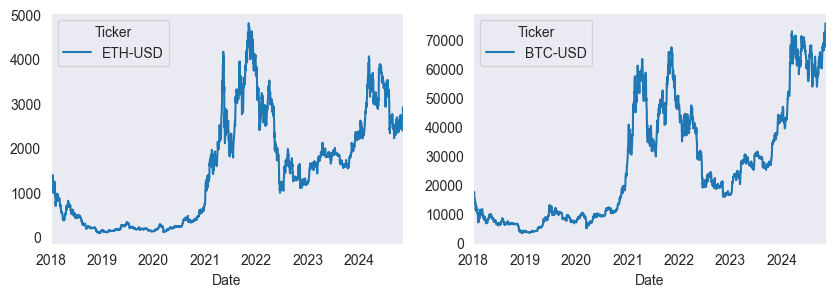

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close'].plot(ax=axs[0])
bitcoin_d['Close'].plot(ax=axs[1])

Huomaamme että Bitcoin painii aivan omassa sarjassaan arvonsa osalta mutta pystymme näkemään yhtäläisyyksiä kurssikehityksen suhteen. Vuodet 2021 - 2022 olivat erittäin tuottavia molempien virtuaalivaluuttojen osalta.

Tarkastellaan tarkkemmin noita vuosia 2021 - 2022, keskitytään tähän aikaväliin. 

<Axes: xlabel='Date'>

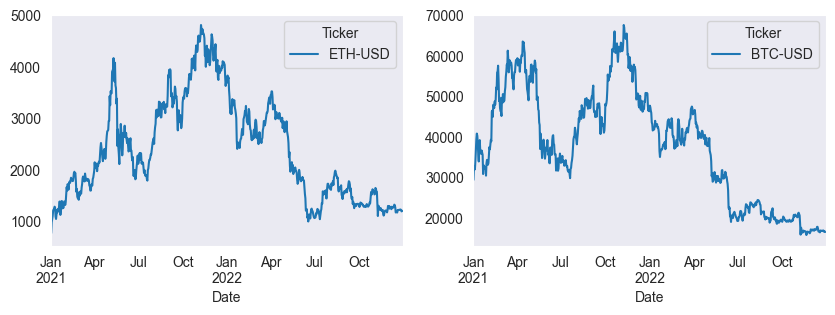

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close']['2021':'2022'].plot(ax=axs[0])
bitcoin_d['Close']['2021':'2022'].plot(ax=axs[1])

Vuoden 2021 nousujohde ei mielestäni näy tässä kunnolla, varsinkin Bitcoinin osalta. Otetaan vuosi 2020 mukaan, jotta saamme nousun alun näkymään.

<Axes: xlabel='Date'>

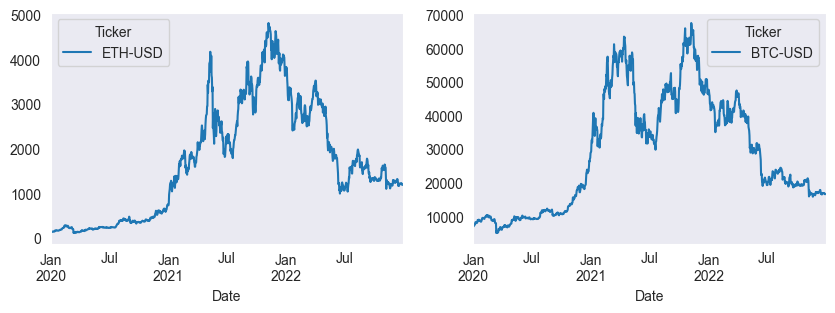

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close']['2020':'2022'].plot(ax=axs[0])
bitcoin_d['Close']['2020':'2022'].plot(ax=axs[1])

Aggregoidaan tämä kuukaisitasolle.

<Axes: xlabel='Date'>

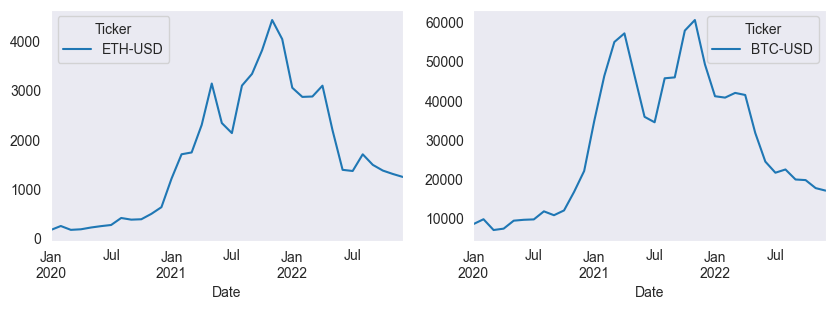

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close']['2020':'2022'].resample('ME').mean().plot(ax=axs[0])
bitcoin_d['Close']['2020':'2022'].resample('ME').mean().plot(ax=axs[1])

Nyt molempien kurssian vuosien 2020 - 2022 aikana tapahtunut piikki näkyy selkeämmin.

Palaan takaisin koko data-aineiston pariin. Vaikka molempien virtuaalivaluuttojen kursseissa ei näy nopeatempoista fluktuaatiota, tasoitetaan viivakaavioita liukuvilla keskiarvoilla.
Tutkitaan aluksi kuukauden (30 päivää) liukuvalla keskiarvolla.

<Axes: xlabel='Date'>

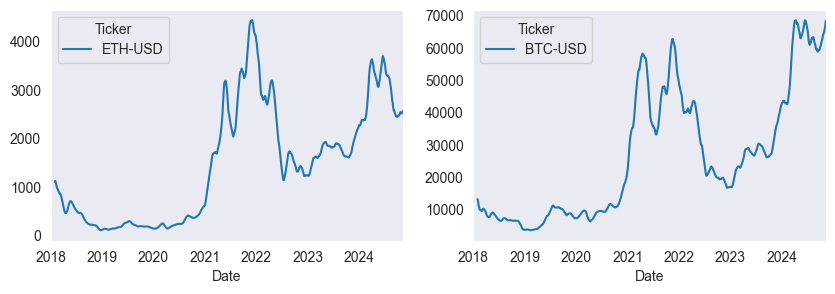

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close'].rolling(30).mean().plot(ax=axs[0])
bitcoin_d['Close'].rolling(30).mean().plot(ax=axs[1])

Vaikka graafia saatinkin mukavasti tasoitettua, kokeillaan hieman pidempää aikaväliä, vaikka vuosineljännes (~ 90 päivää).

<Axes: xlabel='Date'>

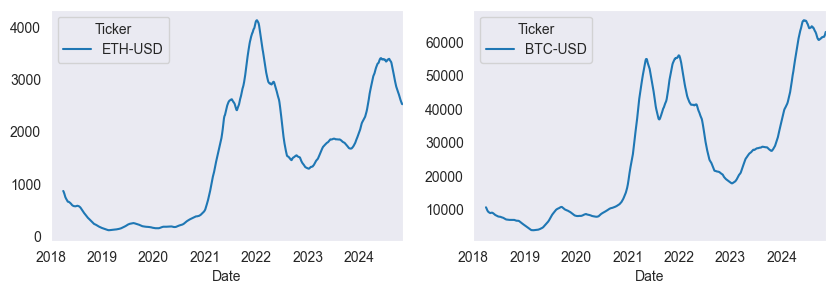

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ethereum_d['Close'].rolling(90).mean().plot(ax=axs[0])
bitcoin_d['Close'].rolling(90).mean().plot(ax=axs[1])

Tämä näyttää paljon paremmalla. 